## Background:
The Street View House Numbers (SVHN) dataset is one of the most popular ones. It has been used in neural networks created by Google to read house numbers and match them to their geolocations. This is a great benchmark dataset to play with and train models that accurately identify street numbers.

## Objective:
In this project we will use dataset with images centred around a single digit (many of the images do contain some distractors at the sides). Although we are taking a sample of the data which is simple, it is more complex than MNIST because the distractors. Given the dataset, our aim is to build a model that can identify house numbers in an image.

In [1]:
# mounting the drive on google colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import h5py
import numpy as np
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow import optimizers
from sklearn import metrics
import seaborn as sns
sns.set()

In [3]:
# reading the data set into Google colab
h5f = h5py.File('/content/drive/My Drive/SVHN_single_grey1.h5', 'r')

In [4]:
X_train = h5f['X_train'][:]
y_train1 = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test1 = h5f['y_test'][:]
# Close this file
h5f.close()

''

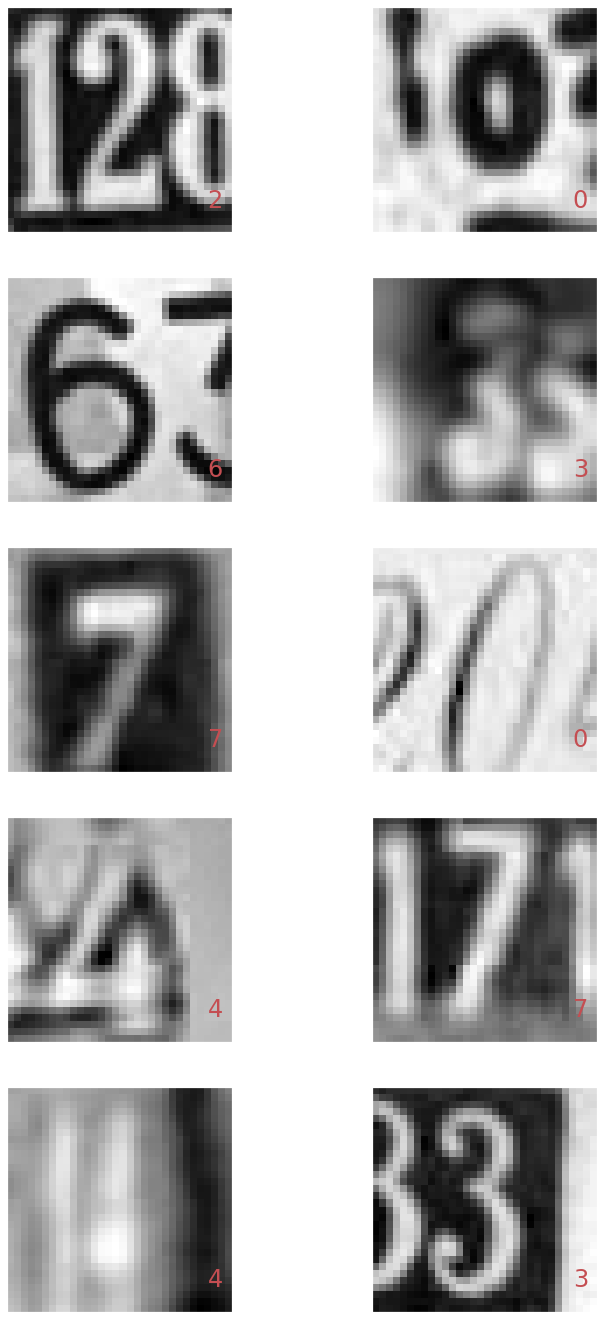

In [7]:
# visualizing the first 10 images with their label:

f, ax = plt.subplots(5,2, figsize=(12,24))
for i in range(10):
    ax[i%5,i//5].imshow(X_train[i,:,:], cmap='gray')
    ax[i%5,i//5].text(28,28,y_train1[i], c='r', fontsize=24)
    # Hide grid lines
    ax[i%5,i//5].grid(False)

    # Hide axes ticks
    ax[i%5,i//5].set_xticks([])
    ax[i%5,i//5].set_yticks([])
;

In [8]:
# pre-processing the data and preparing for NN

# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

# reshaping the data at hand
X_train = X_train.reshape(X_train.shape[0], 1024)
X_test = X_test.reshape(X_test.shape[0], 1024)

# normalize inputs from 0-255 to 0-1; to be used with the NN
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train1)
y_test = to_categorical(y_test1)


# no.of classes
num_classes = y_test.shape[1]
num_hidden = 32

x_tr = []
for i in range(42000):
    x_tr.append(X_train[i,:].flatten())
x_te = []
for i in range(18000):
    x_te.append(X_test[i,:].flatten())

# 2000 samples to be used in knn modelling    
x_tr =x_tr[:2000]
x_te =x_te[:2000]
y_tr = y_train1[0:2000]
y_te = y_test1[0:2000]

print('Number of classes:', num_classes)

Number of classes: 10


In [19]:
# making the neural network by instantiating a Sequential Neural Network

model=Sequential()

In [20]:
# Adding dense layers to the model and specifying the number of neurons and the activation function in each layer 

model.add(Dense(1024,input_dim=1024, activation='relu'))
model.add(Dense(516, activation='tanh'))
model.add(Dense(128, activation='tanh'))
model.add(Dense(10, activation='softmax'))

In [21]:
# Compiling the model and determining the loss function, optimizer, and metric
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [22]:
# fitting the NN to the training data and training the NN by forward and backward propagation
# I have used 500 epochs and 250 for batch size
history=model.fit(X_train, y_train,epochs=500, batch_size=250, verbose=True)

Epoch 1/500
168/168 [==============================] - 1s 6ms/step - loss: 2.3083 - accuracy: 0.1057
Epoch 2/500
168/168 [==============================] - 1s 6ms/step - loss: 2.2738 - accuracy: 0.1508
Epoch 3/500
168/168 [==============================] - 1s 6ms/step - loss: 2.2459 - accuracy: 0.1944
Epoch 4/500
168/168 [==============================] - 1s 6ms/step - loss: 2.2121 - accuracy: 0.2409
Epoch 5/500
168/168 [==============================] - 1s 6ms/step - loss: 2.1630 - accuracy: 0.2860
Epoch 6/500
168/168 [==============================] - 1s 6ms/step - loss: 2.1003 - accuracy: 0.3370
Epoch 7/500
168/168 [==============================] - 1s 6ms/step - loss: 2.0168 - accuracy: 0.3739
Epoch 8/500
168/168 [==============================] - 1s 6ms/step - loss: 1.9225 - accuracy: 0.4109
Epoch 9/500
168/168 [==============================] - 1s 6ms/step - loss: 1.8365 - accuracy: 0.4363
Epoch 10/500
168/168 [==============================] - 1s 6ms/step - loss: 1.7477 - accura

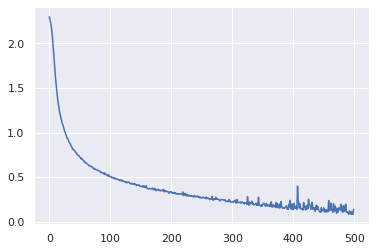

In [23]:
hist=history.history
plt.plot(hist['loss']);

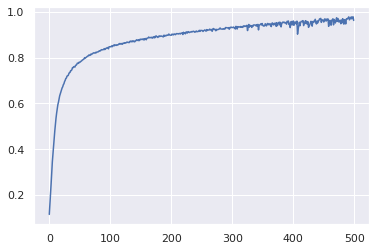

In [24]:
plt.plot(hist['accuracy']);

In [25]:
# model evaluation with test data
loss, acc=model.evaluate(X_test, y_test)
print('Accuracy: %.3f' %acc)
print('Loss: %.3f' %loss)

563/563 [==============================] - 2s 3ms/step - loss: 0.6997 - accuracy: 0.8521
Accuracy: 0.852
Loss: 0.700


In [26]:
# chcking the confusion matrix for multi-class classification
y_predict=model.predict(X_test)
y_pred=[]
for val in y_predict:
    y_pred.append(np.argmax(val))
    
cm=metrics.confusion_matrix(y_test1, y_pred)
print(cm)

[[1573   15   12   26   21   14   20   16   19   98]
 [  14 1518   29   46   58   20   17   73   14   39]
 [   4   11 1569   46   16   18    8   46   20   65]
 [  10   13   30 1402   13  128   14   30   29   50]
 [  14   32   25   25 1590   23   26   14    9   54]
 [  12    4   12   74    7 1555   35   11   18   40]
 [  36    9   19   28   24   99 1513   13   52   39]
 [   9   36   33   27   10   21    7 1629    5   31]
 [  31   22   25   67   12   63   67   13 1404  108]
 [  31   14   21   40   15   55    8   19   16 1585]]


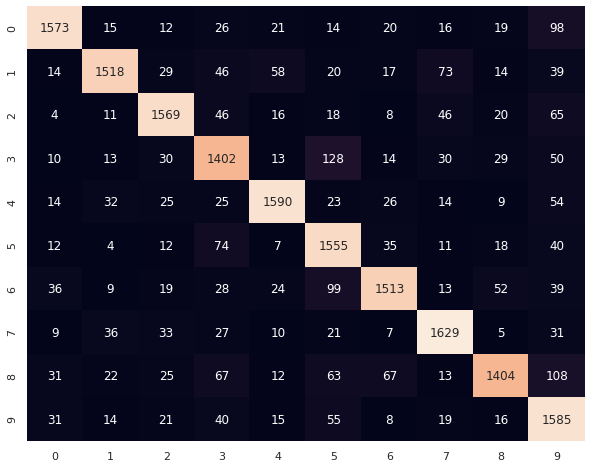

In [27]:
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cbar=False, fmt='g');

In [28]:
# classification report
cr=metrics.classification_report(y_test1, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1814
           1       0.91      0.83      0.87      1828
           2       0.88      0.87      0.88      1803
           3       0.79      0.82      0.80      1719
           4       0.90      0.88      0.89      1812
           5       0.78      0.88      0.83      1768
           6       0.88      0.83      0.85      1832
           7       0.87      0.90      0.89      1808
           8       0.89      0.77      0.83      1812
           9       0.75      0.88      0.81      1804

    accuracy                           0.85     18000
   macro avg       0.86      0.85      0.85     18000
weighted avg       0.86      0.85      0.85     18000



In [ ]:
# comments:
# I used different activation functions (relu, sigmoid, and tanh) and I got the best 
# accuracy score using relu for the first layer and tanh for other hidden layers
# I used two types of optimizers adam and SGD and I got better results with SGD
# I used different values for epochs and batch-size and concluded that the combination
# used in this notebook provided good tradeoff between accuracy and training speed